In [3]:
import pandas as pd
raw=pd.read_csv("D://DataScience/Assignments/9-Association Rules/book.csv")
raw

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
#Dropping Florence column
books = raw.drop(['Florence'], axis=1)
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1
1996,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0


In [6]:
# Apply Apriori Logic
from mlxtend.frequent_patterns import apriori
apriori(books, min_support=0.1)

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.1135,(7)
8,0.1650,"(0, 1)"
9,0.2560,"(0, 2)"


## Support, Item sets along with itemset length

In [7]:
frequent=apriori(books,  min_support=0.01, use_colnames = True)
frequent['length'] = frequent['itemsets'].apply(lambda x: len(x))
frequent

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
498,0.0125,"(ItalCook, ItalAtlas, RefBks, CookBks, ItalArt...",6
499,0.0145,"(DoItYBks, GeogBks, CookBks, RefBks, YouthBks,...",7
500,0.0105,"(ItalCook, DoItYBks, GeogBks, CookBks, ItalArt...",7
501,0.0100,"(ItalCook, GeogBks, CookBks, RefBks, ItalArt, ...",7


## Form Rules and Check the lift ratio

In [8]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent, metric="lift", min_threshold=0.7)
rules['length_con'] = rules['consequents'].apply(lambda x: len(x)) # added length of consequents
rules['length_ant'] = rules['antecedents'].apply(lambda x: len(x)) # added length of antecedents
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,1,1
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,1,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,1,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,1,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9917,(CookBks),"(ItalCook, ItalAtlas, RefBks, ItalArt, ArtBks,...",0.4310,0.0110,0.011,0.025522,2.320186,0.006259,1.014902,6,1
9918,(RefBks),"(ItalCook, ItalAtlas, CookBks, ItalArt, ArtBks...",0.2145,0.0110,0.011,0.051282,4.662005,0.008640,1.042459,6,1
9919,(ItalArt),"(ItalCook, ItalAtlas, RefBks, CookBks, ArtBks,...",0.0485,0.0115,0.011,0.226804,19.722098,0.010442,1.278460,6,1
9920,(ArtBks),"(ItalCook, ItalAtlas, RefBks, CookBks, ItalArt...",0.2410,0.0110,0.011,0.045643,4.149378,0.008349,1.036300,6,1


In [10]:
# Based on Lift Descending order
rules.sort_values('lift', ascending= False) [0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
9380,"(ItalCook, ArtBks, ItalAtlas)","(CookBks, ItalArt, RefBks)",0.0130,0.0165,0.0125,0.961538,58.275058,0.012286,25.571000,3,3
9393,"(CookBks, ItalArt, RefBks)","(ItalCook, ArtBks, ItalAtlas)",0.0165,0.0130,0.0125,0.757576,58.275058,0.012286,4.071375,3,3
9833,"(ItalCook, ArtBks, ItalAtlas, ChildBks)","(ItalArt, RefBks, CookBks)",0.0115,0.0165,0.0110,0.956522,57.971014,0.010810,22.620500,3,4
9884,"(ItalArt, RefBks, CookBks)","(ItalCook, ArtBks, ItalAtlas, ChildBks)",0.0165,0.0115,0.0110,0.666667,57.971014,0.010810,2.965500,4,3
9855,"(ItalArt, ChildBks, RefBks, CookBks)","(ItalCook, ArtBks, ItalAtlas)",0.0150,0.0130,0.0110,0.733333,56.410256,0.010805,3.701250,3,4
9862,"(ItalCook, ArtBks, ItalAtlas)","(ItalArt, ChildBks, RefBks, CookBks)",0.0130,0.0150,0.0110,0.846154,56.410256,0.010805,6.402500,4,3
9391,"(ArtBks, ItalAtlas, CookBks)","(ItalCook, ItalArt, RefBks)",0.0140,0.0160,0.0125,0.892857,55.803571,0.012276,9.184000,3,3
9382,"(ItalCook, ItalArt, RefBks)","(ArtBks, ItalAtlas, CookBks)",0.0160,0.0140,0.0125,0.781250,55.803571,0.012276,4.507429,3,3
9868,"(ItalCook, ItalArt, RefBks)","(ChildBks, ArtBks, ItalAtlas, CookBks)",0.0160,0.0125,0.0110,0.687500,55.000000,0.010800,3.160000,4,3
9849,"(ChildBks, ArtBks, ItalAtlas, CookBks)","(ItalCook, ItalArt, RefBks)",0.0125,0.0160,0.0110,0.880000,55.000000,0.010800,8.200000,3,4


Based on highest Lift Ratio, 
-whoever buys CookBks, RefBks, ItalArt they buy ItalCook, ItalAtlas, ArtBks
-whoever buys CookBks, RefBks, ItalArt they buy ItalCook, ItalAtlas, ArtBks, ChildBks

## Support vs Confidence

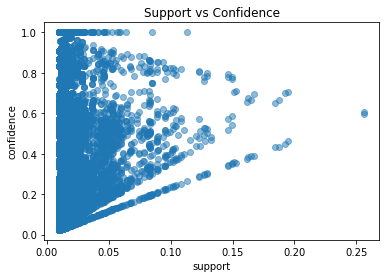

In [11]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

## Support vs Lift

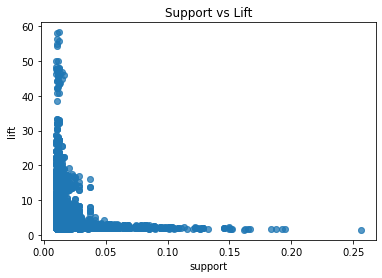

In [17]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

## Lift vs Confidence

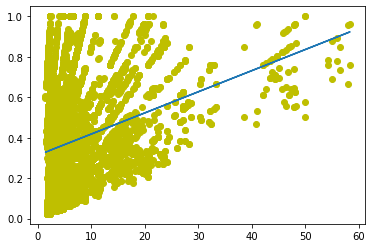

In [20]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))